# Mini-project: ML Preparation (Solution)

Create synthetic x,y, add missing, normalize, plot — prepares for ML modeling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
x = np.linspace(0,10,50)
y = 2*x + rng.normal(0,2,size=len(x))
# Introduce a missing value
x[10] = np.nan

df = pd.DataFrame({'x': x, 'y': y})
print(df.head(12))

           x         y
0   0.000000  0.609434
1   0.204082 -1.671805
2   0.408163  2.317229
3   0.612245  3.105619
4   0.816327 -2.269417
5   1.020408 -0.563543
6   1.224490  2.704660
7   1.428571  2.224658
8   1.632653  3.231704
9   1.836735  1.967382
10       NaN  5.840429
11  2.244898  6.045380


## Cleaning: drop or fill missing

In [2]:
# Drop rows with missing x
clean = df.dropna().copy()
# Alternatively: fill with interpolation
# clean = df.copy(); clean['x'] = clean['x'].interpolate()
print('After drop:', clean.shape)

After drop: (49, 2)


## Normalize features

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XY = sc.fit_transform(clean[['x','y']])
clean[['x_scaled','y_scaled']] = XY
print(clean.head())

          x         y  x_scaled  y_scaled
0  0.000000  0.609434 -1.718785 -1.516804
1  0.204082 -1.671805 -1.649468 -1.874943
2  0.408163  2.317229 -1.580151 -1.248692
3  0.612245  3.105619 -1.510833 -1.124921
4  0.816327 -2.269417 -1.441516 -1.968764


## Plot scaled x vs y

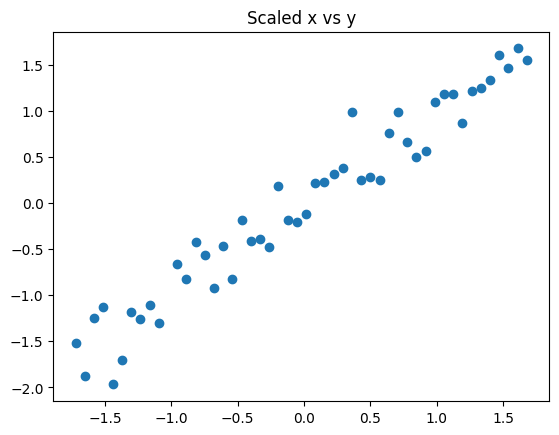

In [4]:
plt.figure()
plt.scatter(clean['x_scaled'], clean['y_scaled'])
plt.title('Scaled x vs y')
plt.show()